In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


In [4]:

# Load cleaned CSVs
benin = pd.read_csv("../data/benin_clean.csv")
sierra_leone = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

# Label each dataset
benin["Country"] = "Benin"
sierra_leone["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

# Combine all data
df = pd.concat([benin, sierra_leone, togo], ignore_index=True)

# Define metrics to compare
metrics = ["GHI", "DNI", "DHI"]


C:\Users\cha\AppData\Local\Temp\ipykernel_10560\3047213126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Country", y=metric, palette="Set2")


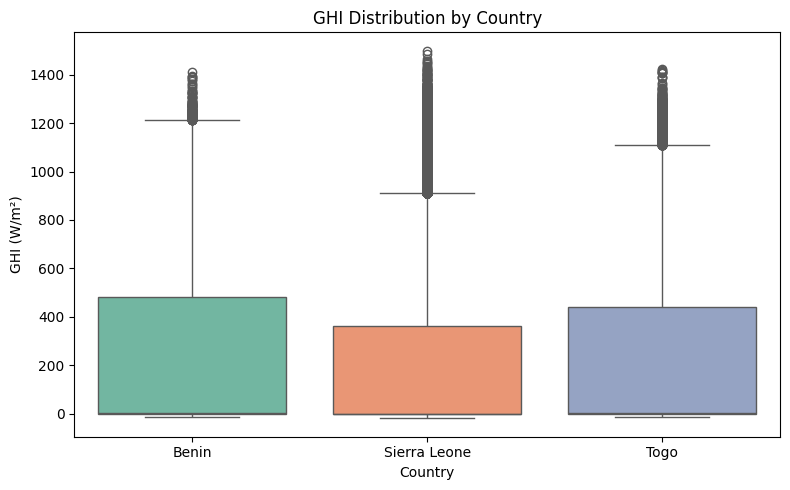

C:\Users\cha\AppData\Local\Temp\ipykernel_10560\3047213126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Country", y=metric, palette="Set2")


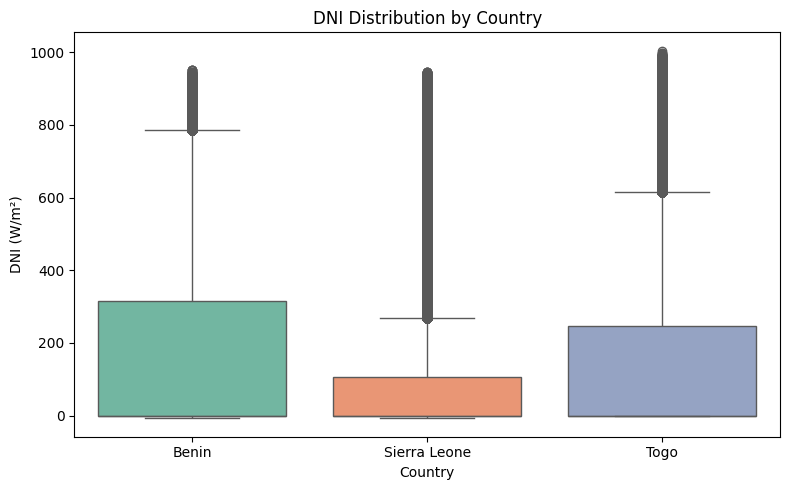

C:\Users\cha\AppData\Local\Temp\ipykernel_10560\3047213126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Country", y=metric, palette="Set2")


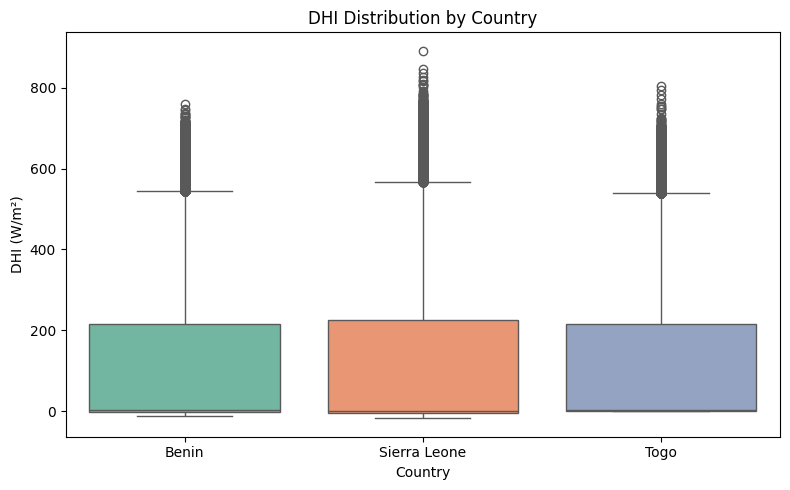

In [6]:

# Boxplots per metric
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="Country", y=metric, palette="Set2")
    plt.title(f"{metric} Distribution by Country")
    plt.ylabel(f"{metric} (W/m²)")
    plt.xlabel("Country")
    plt.tight_layout()
    plt.show()


In [7]:

# Summary Table (mean, median, std)
summary = df.groupby("Country")[metrics].agg(["mean", "median", "std"])
summary.columns = ["_".join(col).strip() for col in summary.columns.values]
print("Summary Statistics Table:\n")
print(summary)


Summary Statistics Table:

                GHI_mean  GHI_median     GHI_std    DNI_mean  DNI_median  \
Country                                                                    
Benin         240.559452         1.8  331.131327  167.187516        -0.1   
Sierra Leone  201.957515         0.3  298.495150  116.376337        -0.1   
Togo          230.555040         2.1  322.532347  151.258469         0.0   

                 DNI_std    DHI_mean  DHI_median     DHI_std  
Country                                                       
Benin         261.710501  115.358961         1.6  158.691074  
Sierra Leone  218.652659  113.720571        -0.1  158.946032  
Togo          250.956962  116.444352         2.5  156.520714  


In [8]:

# ANOVA for GHI
f_stat, p_val = f_oneway(benin["GHI"], sierra_leone["GHI"], togo["GHI"])
print(f"\nOne-way ANOVA result on GHI:\nF-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")
if p_val < 0.05:
    print("=> Statistically significant difference in GHI across countries.")
else:
    print("=> No statistically significant difference in GHI across countries.")



One-way ANOVA result on GHI:
F-statistic = 2090.09, p-value = 0.0000
=> Statistically significant difference in GHI across countries.


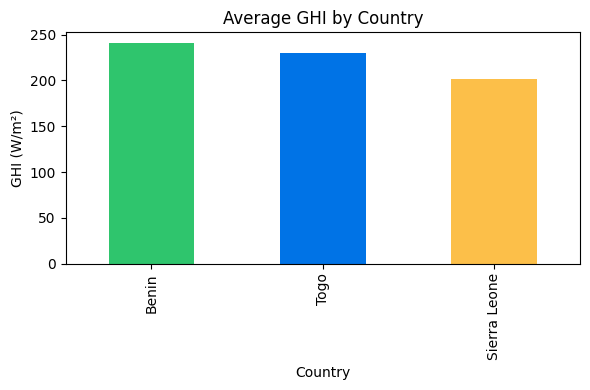

In [9]:

# Bar chart of average GHI
avg_ghi = df.groupby("Country")["GHI"].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
avg_ghi.plot(kind="bar", color=["#2FC56D", "#0073e6", "#fcbf49"])
plt.title("Average GHI by Country")
plt.ylabel("GHI (W/m²)")
plt.tight_layout()
plt.show()
